## Plot a Lineage with bactrack.

In [1]:
from bactrack.core import compute_hierarchy
dir = "/Users/sherryyang/Documents/wiggins-lab/debug_phase"
hier_arr = compute_hierarchy(dir, submodel= 'bact_phase_omni')

import bactrack.core as core
nodes, edges = core.run_tracking(hier_arr)

WRITING LOG OUTPUT TO /Users/sherryyang/.cellpose/run.log
2024-04-13 16:04:44,366	[INFO]	core    comp...archy()	 line 33	Using Omnipose model
2024-04-13 16:04:44,386	[INFO]	        _use...torch()	 line 74	** TORCH GPU version installed and working. **
2024-04-13 16:04:44,387	[INFO]	models  __init__....()	 line 427	>>bact_phase_omni<< model set to be used
2024-04-13 16:04:44,388	[INFO]	core    _use...torch()	 line 74	** TORCH GPU version installed and working. **
2024-04-13 16:04:44,388	[INFO]	        assi...evice()	 line 85	>>>> using GPU


  0%|          | 0/89 [00:00<?, ?it/s]

Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile separately.
Running on tiles. Now normalizing each tile sepa

100%|██████████| 89/89 [00:07<00:00, 12.19it/s]

2024-04-13 16:05:16,505	[INFO]	                    	 line 71	Segmentation hierarchy builded.


2024-04-13 16:05:16,898	[INFO]	                    	 line 78	Labeled feature of each segmentation in hierarchy.
Weight function start computing weight matrix
Weight matrix computed, time consuming:0.151702880859375 sec
no mask_penalty
Set parameter Username
Academic license - for non-commercial use only - expires 2025-01-07
Setting up MIP problem
MIP problem set up: time used 0.5231831073760986 sec
Set parameter NodeLimit to value 1073741824
Set parameter SolutionLimit to value 1073741824
Set parameter IntFeasTol to value 1e-06
Set parameter Method to value 3
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.0.0 23A344)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 5622 rows, 12468 columns and 26248 nonzeros
Model fingerprint: 0xed9a3386
Variable types: 0 continuous, 12468 integer (10813 binary)
Coefficient statistics:
  Matrix range     [4e-05, 4e+09]
  Objective range  [2e-03, 1e+00]
  Bo

In [8]:
from bactrack import io
import pandas as pd
from bactrack.gui.cell import Cell
from  bactrack.gui.composer import LinkComposer
import  bactrack.gui.extractor  as extractor
import  bactrack.gui.visualizer as visualizer
import numpy as np
import logging


mask_arr, edge_df = io.format_output(hier_arr, nodes, edges)
hier_df = io.hiers_to_df(hier_arr)

merged_df = pd.merge(edge_df, hier_df.add_suffix('_source'), left_on='Source Index', right_on='index_source', how='left')
merged_df = pd.merge(merged_df, hier_df.add_suffix('_target'), left_on='Target Index', right_on='index_target', how='left')
n_selected =  hier_df[hier_df['label'].notna()]

cells = set()
for index, row in n_selected.iterrows():
    binary_mask = np.zeros(row['shape'], dtype=np.uint8)
    binary_mask[row['value'][:,0], row['value'][:,1]] = 1
    try:
        polygon =  extractor.single_cell_mask_to_polygon(binary_mask)
        cells.add(Cell(polygon = polygon, label = row['index'], frame=row['frame']))
    except:
        print(f"Cannot extract cell {row['index']}")

composer =  LinkComposer(cells=cells)
#composer.phase_folder = dir + '/*.tif'
G = composer.make_new_dircted_graph()

for index, row in merged_df.iterrows():
    #G.add_edge(Cell(label = row['Source Index'], frame = row['frame_source']), Cell(label = row['Target Index'], frame = row['frame_target']))
    try:
        composer.link(G, Cell(label = row['Source Index'], frame = row['frame_source']), Cell(label = row['Target Index'], frame = row['frame_target'])) 
    except:
        print(f"Cannot link {row['Source Index']} to {row['Target Index']}")

logging.info(f"Tracking completed: {len(G.nodes)} IOU tracked")

Tracking completed: 1189 IOU tracked


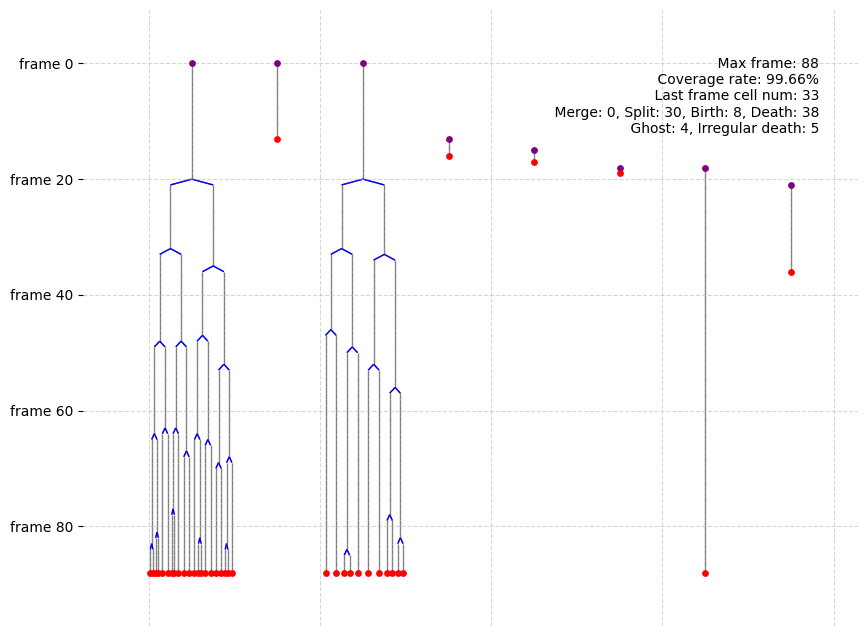

In [9]:
visualizer.quick_lineage(G)